# TP 12 : Diagonalisation

Consignes :

- Renommer ce fichier <b>nom1-nom2-TP12</b> , en cliquant sur le titre du fichier "TP 12 : Diagonalisation" en haut à gauche



- <center>ATTENTION : </center>
    
  <u>   <center> le TP est à rendre dans le devoir Teams à la fin de la séance. </center> </u>
    
 
    
    
    
- TP à faire par groupes de 2. Le groupe de travail sera le même pour toute l'année.


  Cliquer deux fois sur la cellule pour completer ci-dessous :

- NOM PRENOM : CACHEUX Nolan
- NOM PRENOM : MERLAUD Thomas


# Espaces vectoriels

La commande `VectorSpace(K,n)` permet de définir l'espace vectoriel $\mathbb{K}^n$.

Par exemple on peut définir :



In [50]:
E = VectorSpace(QQ,3) #ou plus simplement : E = QQ^3
E

Vector space of dimension 3 over Rational Field

La commande `MatrixSpace(K,n,p)` permet de définir l'espace des matrices à  $n$  lignes et  $p$  colonnes à coefficients dans  $\mathbb{K}$  :

In [51]:
M22Q = MatrixSpace(QQ,2,2) ;  M22Q

Full MatrixSpace of 2 by 2 dense matrices over Rational Field

La dimension d'un espace peut être obtenue par `E.dimension()`

In [52]:
E.dimension()

3

In [53]:
M22Q.dimension()

4

Tout espace vectoriel possède une base canonique.


In [54]:
E.basis()

[
(1, 0, 0),
(0, 1, 0),
(0, 0, 1)
]

In [55]:
M22Q.basis()

Finite family {(0, 0): [1 0]
[0 0], (0, 1): [0 1]
[0 0], (1, 0): [0 0]
[1 0], (1, 1): [0 0]
[0 1]}

La méthode `coordinates` donne les coordonnées d'un vecteur dans la base utilisateur.

In [56]:
w = vector([3,2,6])
E.coordinates(w) # sous forme de liste

[3, 2, 6]

In [57]:
E.coordinate_vector(w) # sous forme de vecteur

(3, 2, 6)

On peut utiliser une base différente de celle canonique en utilisant `subspace_with_basis`

In [58]:
F = VectorSpace(QQ,2) ; 
print(F)
print(F.basis())

e1p = vector([1,1])
e2p = vector([1,-1])

G = F.subspace_with_basis([e1p,e2p]) ;  #on crée un "autre" espace avec la nouvelle base
G

Vector space of dimension 2 over Rational Field
[
(1, 0),
(0, 1)
]


Vector space of degree 2 and dimension 2 over Rational Field
User basis matrix:
[ 1  1]
[ 1 -1]

In [59]:
u = vector([-2,1])
F.coordinates(u)

[-2, 1]

In [60]:
G.coordinates(u)

[-1/2, -3/2]

In [61]:
G.echelon_coordinates(u) #donne les coordonnées dans la base canonique

[-2, 1]

# EXERCICE 1

Dans  $\mathbb{R}^3$  muni de sa base canonique  $B=\{i,j,k\}$ , on considère les vecteurs suivants : $ u=2i−j+k$, $ v=i+2j−k $ et  $w=i+j−3k $.

Montrer que la famille  $\{u,v,w\} $ est une base de   $\mathbb{R}^3$  et déterminer les coordonnées du vecteur  $x=2i+3j+4k$  dans la base $ B′=\{u,v,w\}$ .

In [62]:
u = (2, -1, 1)
v = (1, 2, -1)
w = (1, 1, -3)
A = matrix(3,3, [u,v,w])
#Affichage du determinant de A
show(det(A))
print("Le déterminant est différent de 0 donc la famille munies des trois vecteurs {u,v,w} est libre et donc forme une base dans R3")

-13

Le déterminant est différent de 0 donc la famille munies des trois vecteurs {u,v,w} est libre et donc forme une base dans R3


In [63]:
Q = VectorSpace(QQ,3)
Bprim = Q.subspace_with_basis([u,v,w])

#on crée un "autre" espace avec la nouvelle base
#On peut utiliser une base différente de celle canonique en utilisant subspace_with_basis

x = vector([2, 3, 4])
F = Bprim.coordinates(x)

#Affichage des coordonnées du vecteur x dans la nouvelle base 
show(F)
print("On calcule A*X : ",A*x)

[8/13, 37/13, -27/13]

On calcule A*X :  (5, 4, -7)


# Valeurs propres, vecteurs propres, diagonalisation

Comment utiliser Sage pour diagonaliser une matrice, c'est-à-dire chercher une matrice  $P$  inversible telle que  $P^{−1}AP$  soit diagonale ?

Pour les valeurs propres :

- On définit la matrice : `A=matrix(.....)`
- On calcule le polynôme caracteristique : `det(x-A)` ou `charpoly(A)` (ou  `A.characteristic_polynomial())` 
- On factorise le polynôme caracteristique pour lire les valeurs propres de  $A$  (`factor(det(x-A))` ou `factor(charpoly(A))`)
  et on vérifie le calcul des valeurs propres avec la commande de Sage (`A.eigenvalues()`  ("eigen = propre en allemand"))

Pour les vecteurs propres :

- On calcule le vecteur propre pour chaque valeur propre : `A.kernel()` (`help(kernel)`) 
- Attention : `A.kernel()`  calcule par défaut le noyau à gauche de  $A$ , i.e. l'ensemble des vecteurs (lignes)  $v$  tels que  $vA=0$ . Donc on explicite celui qui nous intéresse: `left_kernel()` ou `right_kernel()`.
- Pour extraire le vecteur : `(A - lambda).right_kernel().basis()`
- Si elle est diagonalisable, on crée la matrice de passage $ P$  de la base canonique vers une base  $B$  formée par les vecteurs propres.
- On vérifie que  $P^{−1}AP$   soit une matrice diagonale

# EXERCICE 2

Considérons l'application linéaire associée à la matrice  $A$  suivante :  $\left[\begin{matrix} 4 & 1 & -4 \\ 8 & 3 & -10 \\ 5 & 1 & -5 \end{matrix}\right].$

Exprimer $A$ dans une nouvelle base, afin que que la nouvelle matrice soit diagonale.

<u>Décrire et commenter étape par étape votre raisonnement et vos calculs.

In [64]:
A = matrix([[4,1,-4],[8,3,-10],[5,1,-5]])
print("On crée la matrice A :")
show(A)
print("On calcule le polynôme caractéristique : ",charpoly(A))

print("\nOn factorise le polynôme caracteristique pour lire les valeurs propres de  A :\n",factor(charpoly(A))) 
print("\nOn vérifie le calcul des valeurs propres avec la commande de Sage A.eigenvalues() : ",A.eigenvalues())
print("\nDonc les valeurs propres sont : ",A.eigenvalues()[0],",",A.eigenvalues()[1],"et",A.eigenvalues()[2])

print("\nOn calcule le vecteur propre pour chaque valeur propre :\n")
print("Pour λ1 =",A.eigenvalues()[0],",le vecteur propre est :\n",(A - A.eigenvalues()[0]).right_kernel().basis(),"\n")
print("Pour λ2 =",A.eigenvalues()[1],",le vecteur propre est :\n",(A - A.eigenvalues()[1]).right_kernel().basis(),"\n")
print("Pour λ3 =",A.eigenvalues()[2],",le vecteur propre est :\n",(A - A.eigenvalues()[2]).right_kernel().basis(),"\n")

print("Si elle est diagonalisable, on crée la matrice de passage  P  de la base canonique vers une base  B  formée par les vecteurs propres.")
print("\nLa matrice de passage :")
P = matrix([[1, 2, 1],[1, 1, 1],[1, 3, 2]]).transpose()
show(P)

print("On vérifie que  P^−1*A*P  soit une matrice diagonale :")
show(P.inverse()*A*P)

On crée la matrice A :


[  4   1  -4]
[  8   3 -10]
[  5   1  -5]

On calcule le polynôme caractéristique :  x^3 - 2*x^2 - x + 2

On factorise le polynôme caracteristique pour lire les valeurs propres de  A :
 (x - 2) * (x - 1) * (x + 1)

On vérifie le calcul des valeurs propres avec la commande de Sage A.eigenvalues() :  [2, 1, -1]

Donc les valeurs propres sont :  2 , 1 et -1

On calcule le vecteur propre pour chaque valeur propre :

Pour λ1 = 2 ,le vecteur propre est :
 [
(1, 2, 1)
] 

Pour λ2 = 1 ,le vecteur propre est :
 [
(1, 1, 1)
] 

Pour λ3 = -1 ,le vecteur propre est :
 [
(1, 3, 2)
] 

Si elle est diagonalisable, on crée la matrice de passage  P  de la base canonique vers une base  B  formée par les vecteurs propres.

La matrice de passage :


[1 1 1]
[2 1 3]
[1 1 2]

On vérifie que  P^−1*A*P  soit une matrice diagonale :


[ 2  0  0]
[ 0  1  0]
[ 0  0 -1]

# EXERCICE 3

a) Écrire une fonction `diagonalize(A)` qui renvoie une liste $[D, P]$ formée d'une matrice diagonale  $D$  et d'une matrice inversible  $P$  telle que  $P^{-1}AP=D$ ; si la matrice n'est pas diagonalisable, un message d'erreur est affiché.

In [65]:
"""
Une matrice est diagonalisable si et seulement si :

Son polynôme caractéristique est scindé et
pour toute valeur propre, la multiplicité géométrique est égale à la multiplicité algébrique.
Une matrice carrée n×n est diagonalisable si et seulement si elle possède n vecteurs propres formant une base

"""

def diagonalize(A):
    valeurs_propres = A.eigenvalues()
    valeurs_propres_liste = []
    vecteurs_propres_liste = []
    
    for i in range(len(valeurs_propres)):
        
        valeur_propre_actuel = valeurs_propres[i]
        
        if (not valeur_propre_actuel in valeurs_propres_liste):
            #on vérifie que la valeur propre ne fait pas déjà partie de notre liste
            
            vecteur_propre_actuel = (A - valeur_propre_actuel * matrix.identity(A.nrows())).right_kernel().basis()
            
            for i in range (len(vecteur_propre_actuel)):
                valeurs_propres_liste.append(valeur_propre_actuel)
                
            vecteurs_propres_liste += vecteur_propre_actuel
    
    P = matrix(vecteurs_propres_liste).transpose()
    if (P.rank() != A.nrows()):
            return "Cette matrice n'est pas diagonalisable"

    D = diagonal_matrix(valeurs_propres_liste)
    return [D, P]
    

b) Essayer votre fonction sur les matrices suivantes (comparer avec `A.right_eigenmatrix())`.

In [66]:
A1 = matrix(QQ, [[1, 2], [0,2]])
A1

[1 2]
[0 2]

In [67]:
print("Avec A.right_eigenmatrix()) :")
show(A1.right_eigenmatrix())
print("Avec notre fonction diagonalize() :")
show(diagonalize(A1))

Avec A.right_eigenmatrix()) :


(
[2 0]  [  1   1]
[0 1], [1/2   0]
)

Avec notre fonction diagonalize() :


[
[2 0]  [  1   1]
[0 1], [1/2   0]
]

In [68]:
A2 = matrix(QQ, [[16,9,83,-33,-24,8], [13,5,56,-27,-18,4], [37,29,236,-83,-64,26], [-66,-45,-385,145,108,-40], [221,157,1323,-487,-367,140], [-40,-40,-302,96,78,-36]])
A2

[  16    9   83  -33  -24    8]
[  13    5   56  -27  -18    4]
[  37   29  236  -83  -64   26]
[ -66  -45 -385  145  108  -40]
[ 221  157 1323 -487 -367  140]
[ -40  -40 -302   96   78  -36]

In [69]:
print("Avec A.right_eigenmatrix()) :")
show(A2.right_eigenmatrix())
print("Avec notre fonction diagonalize() :")
show(diagonalize(A2))

Avec A.right_eigenmatrix()) :


(
[-1  0  0  0  0  0]  [  1   1   1   0   1   0]
[ 0 -2  0  0  0  0]  [  1   0   0   1   0   1]
[ 0  0  1  0  0  0]  [  3   5   2  -1   7  -2]
[ 0  0  0  1  0  0]  [ -5  -7  -3  -2 -11   3]
[ 0  0  0  0  0  0]  [ 17  25  11   1  37 -10]
[ 0  0  0  0  0  0], [ -4  -8  -2   4  -9   2]
)

Avec notre fonction diagonalize() :


[
[-1  0  0  0  0  0]  [  1   1   1   0   1   0]
[ 0 -2  0  0  0  0]  [  1   0   0   1   0   1]
[ 0  0  1  0  0  0]  [  3   5   2  -1   7  -2]
[ 0  0  0  1  0  0]  [ -5  -7  -3  -2 -11   3]
[ 0  0  0  0  0  0]  [ 17  25  11   1  37 -10]
[ 0  0  0  0  0  0], [ -4  -8  -2   4  -9   2]
]

In [70]:
A3 = matrix(QQ, [[5, 2], [0,5]])
A3

[5 2]
[0 5]

In [71]:
print("Avec A.right_eigenmatrix()) :")
show(A3.right_eigenmatrix())
print("Avec notre fonction diagonalize() :")
show(diagonalize(A3))

Avec A.right_eigenmatrix()) :


(
[5 0]  [1 0]
[0 5], [0 0]
)

Avec notre fonction diagonalize() :


"Cette matrice n'est pas diagonalisable"

# EXERCICE 4

Considérons la matrice  $M$  suivante :  $\left[\begin{matrix} 3 & 0 & 0 \\ 1 & 3 & 1 \\ -1 & 0 & 2 \end{matrix}\right].$

Calculer la puissance  $M^7$  en utilisant sa matrice diagonale et de passage. 

Écrivez aussi la relation que vous utilisez pour ce calcul.

In [72]:
M = matrix(3,3, [[3,0,0], [1,3,1], [-1,0,2]])
print("On calcule le polynôme caractéristique : ",charpoly(M))

print("\nOn factorise le polynôme caracteristique pour lire les valeurs propres de  A :\n",factor(charpoly(M))) 
print("\nOn vérifie le calcul des valeurs propres avec la commande de Sage A.eigenvalues() : ",M.eigenvalues())
print("\nLes valeurs propres sont : ",M.eigenvalues()[0],",",M.eigenvalues()[1],"et",M.eigenvalues()[2])

D = matrix(3,3,[[2,0,0], [0,3,0], [0,0,3]])
P = matrix(3,3,[[0,1,0],[1,0,1],[-1,-1,0]])
print("\nLa matrice diagonale de M est ")
show(D)
print("La matrice de passage de P est ")
show(P)
print("On sait que : M^k = P * D^k * P^-1 donc M exposant 7 : ")
show(P*D^7*P^-1)

On calcule le polynôme caractéristique :  x^3 - 8*x^2 + 21*x - 18

On factorise le polynôme caracteristique pour lire les valeurs propres de  A :
 (x - 2) * (x - 3)^2

On vérifie le calcul des valeurs propres avec la commande de Sage A.eigenvalues() :  [2, 3, 3]

Les valeurs propres sont :  2 , 3 et 3

La matrice diagonale de M est 


[2 0 0]
[0 3 0]
[0 0 3]

La matrice de passage de P est 


[ 0  1  0]
[ 1  0  1]
[-1 -1  0]

On sait que : M^k = P * D^k * P^-1 donc M exposant 7 : 


[ 2187     0     0]
[ 2059  2187  2059]
[-2059     0   128]

# EXERCICE 5 : Méthode de la puissance

Écrire la fonction `eigpower(A,nmax,v0)` qui évalue numériquement une valeur propre d'une matrice.

Elle calcule avec la méthode de la puissance la valeur propre de  $A$  de module maximal à partir d'une donnée initial qui par défaut est le vecteur constitué de 1.

La fonction retourne le vecteur propre $v$ tel que  $A∗v=\lambda∗v$  et le numéro de l'iteration à laquelle  $v$  a été calculé.

Des suggestions :

- Définir  $v0$  un vecteur unitaire colonne de la même taille que la matrice  $A$ .
- Calculer le produit de la matrice  $A$  par  $v0$  :  $vProd=A∗v0$ .
- On normalise (norm) le vecteur :  $v0=vProd/norm(vProd)$ 
- Calculer  $\lambda=v0^T∗A∗v0 $.
- Jusqu'à quand on n'a pas rejoint le nombre maximales d'iterations, calculer  $vProd=A∗v0$, le normaliser et  $\lambda=v0^T∗A∗v0$ 
- Returner  $\lambda$, le nombre d'iterations effectuées et le vecteur propre associée $v$.


Testez votre fonction avec la  matrice  B  ci-dessous et comparez votre résultat avec la commande `B.eigenvalues()`

In [73]:
B = matrix(QQ, [[30, 2,3,13], [5,11,10,8],[9,7,6,12],[4,14,15,1]]); B

[30  2  3 13]
[ 5 11 10  8]
[ 9  7  6 12]
[ 4 14 15  1]

In [74]:
def eigpower(A,nmax,v0):
    
    i = 0
    #on va définir  v0 ,un vecteur unitaire colonne de la même taille que la matrice A.
    v0 = matrix(QQ,v0).transpose()
    #on va calculer le produit de la matrice  A  par  v0  :  vProd=A∗v0  
    vProd = A * v0
    ldepart = transpose(v0)*vProd
    l = ldepart + 1
    
    #Jusqu'à quand on n'a pas rejoint le nombre maximales d'iterations, 
    while (i < nmax): 
        #calculer  vProd=A∗v0 ,
        vProd = A*v0
        #, le normaliser
        v0 = vProd/vProd.norm()
        # et  λ=v0T∗A∗v0
        l = transpose(v0)*A*v0
        i = i + 1
    #On retourne λ , le nombre d'iterations effectuées et le vecteur propre associée  v
    return [l,v0,i]


In [75]:
# affichage de eigpower()
show(eigpower(B, 20, vector([1,1,1,1])))
# affichage de B.eigenvalues()
show(B.eigenvalues())

print("\nOn a bien une valeur propre approximativement égale : ")

# affichage de eigpower()
show(eigpower(B, 20, vector([1,1,1,1]))[0])
# affichage de B.eigenvalues()
show(B.eigenvalues()[-1])



[
                     [ 0.7354225381337087]    
                     [0.38151791175712196]    
                     [0.41375598069479036]    
[39.39601087034531], [0.37736422969427147], 20
]

[-9.50221368271688?, 0.2854057899066645?, 17.82079703055716?, 39.39601086225306?]


On a bien une valeur propre approximativement égale : 


[39.39601087034531]

39.39601086225306?

# EXERCICE 6 : Connections interurbaines

Etant donné  $n$  villes, on note  $A$  la matrice dont les coefficients $ a_{ij}$  valent $1$ si la  $i− ème$ ville est directement reliée à la  $j− ème$, et $0$ sinon.

On peut montrer que les composantes d'un vecteurs propre $x$ de norme 1 associé à la valeur propre la plus grande donnent le taux d'accessibilité (qui est une mesure de la facilité d'accès) des diverses villes.

Calculer ce vecteur dans le cas des connections ferroviaires entre les onze plus grandes villes de Lombardie.

<img src=lombardie.jpg></img>

On note  $A\in M_{11 \times 11}(\mathbb{R})$  la matrice associée au réseau ferroviaire de Lombardie, i.e. la matrice dont les coefficients  $a_{ij}$  sont égaux à $1$ s'il y a une connection directe entre la ville  $i$  et la ville  $j$ , et $0$ sinon.

En posant $v0$  le vecteur unitaire avec $11$ composantes, calculer avec la méthode de la puissance (fonction `eigpower` de l'exercice 5) l'approximation d'un vecteur propre associé à la valeur propre de  $A$  de plus grand module.

En déduire la ville la mieux et la moins bien desservie.

[0 1 1 1 1 1 1 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 1 0]
[1 0 0 0 1 0 0 0 0 1 0]
[1 0 0 1 0 1 0 1 0 0 0]
[1 0 0 0 1 0 0 1 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 0 0 1 0 0]
[0 0 0 0 0 0 0 1 0 0 0]
[0 0 1 1 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 1 0]

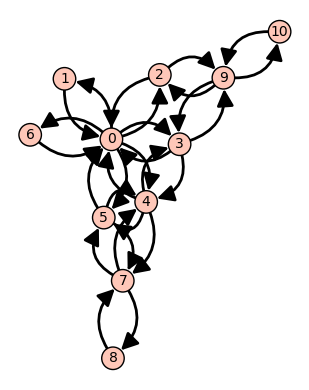


On définit v0 ,un vecteur unitaire colonne de la même taille que la matrice A.

Donc l'approximation d'un vecteur propre associé à la valeur propre de  A  de plus grand module :


[
                      [  0.5265245505387183]    
                      [ 0.15924995519447685]    
                      [  0.2168888908019526]    
                      [  0.3583454219664402]    
                      [ 0.46908047665166225]    
                      [  0.3863572609797849]    
                      [ 0.15924995519447685]    
                      [  0.2835890806060497]    
                      [ 0.08565077462082048]    
                      [ 0.19028681879168924]    
[3.3152346660795553], [0.057638935607475766], 20
]

[0, 0, 0, -2.533801436189426?, -1.831722184254401?, -1.172402942421557?, -1.123465230817891?, 0.4387983012893731?, 1.155158040256600?, 1.752194770728764?, 3.315240681408537?]

In [76]:
#On construit A à partir des connexion directe avec les autres villes
#A est directement connecté à 2,3,4,5,6,7 

A = matrix(11, 11, [
           [0,1,1,1,1,1,1,0,0,0,0],
           [1,0,0,0,0,0,0,0,0,0,0],
           [1,0,0,0,0,0,0,0,0,1,0],
           [1,0,0,0,1,0,0,0,0,1,0],
           [1,0,0,1,0,1,0,1,0,0,0],
           [1,0,0,0,1,0,0,1,0,0,0],
           [1,0,0,0,0,0,0,0,0,0,0],
           [0,0,0,0,1,1,0,0,1,0,0],
           [0,0,0,0,0,0,0,1,0,0,0],
           [0,0,1,1,0,0,0,0,0,0,1],
           [0,0,0,0,0,0,0,0,0,1,0]
])

show(A)

show(DiGraph(A))


print("\nOn définit v0 ,un vecteur unitaire colonne de la même taille que la matrice A.")
print("\nDonc l'approximation d'un vecteur propre associé à la valeur propre de  A  de plus grand module :")
show(eigpower(A, 20, vector([1,1,1,1,1,1,1,1,1,1,1])))

show(A.eigenvalues())
#Pour savoir la ville la mieux desservie on calcule les valeurs propres en regardant la plus grande et la plus petite.

In [77]:
show("On en déduit que la ligne avec le nombre le plus proche de 1 est la une qui est Milan.\nDonc Milan est la ville la plus connectee et la ville la moins connectee est Mantoue")

'On en déduit que la ligne avec le nombre le plus proche de 1 est la une qui est Milan.\nDonc Milan est la ville la plus connectee et la ville la moins connectee est Mantoue'

# Curiosité:  L'algèbre linéaire à la base de Google!


<p><span id="cell_outer_73"><a href="http://www.incomediary.com/wp-content/uploads/2012/02/larry-page-sergey-brin.jpg">Deux jeunes docteurs en informatique</a> ont un jour eu l'id&eacute;e de classer les pages web par ordre de pertinence (puis ils ont fond&eacute; une compagnie pour mettre en pratique <a href="http://en.wikipedia.org/wiki/Pagerank">leur id&eacute;e</a> et &ccedil;a a <a href="https://www.google.com/finance?chddm=953649&amp;q=GOOG">plut&ocirc;t pas mal march&eacute;</a>). </span></p>
<p><span>Leur id&eacute;e &eacute;tait de consid&eacute;rer qu'une page est pertinente si elle est r&eacute;f&eacute;renc&eacute;e par beaucoup de pages pertinentes. On peut impl&eacute;menter cette id&eacute;e un peu circulaire gr&acirc;ce &agrave; la notion de marche al&eacute;atoire: on repr&eacute;sente le web par un graphe orient&eacute; (exemples de graphe : connections interurbaines des villes de Lombardie), chaque sommet repr&eacute;sente une page et les ar&ecirc;tes repr&eacute;sentent les hyperliens. On imagine quelqu'un se baladant al&eacute;atoirement de page en page; &agrave; la longue il finira par tomber sur les pages les plus pertinentes puisqu'elles vont avoir tendance &agrave; attirer le trafic.</span></p>
<p>Voici comment on peut cr&eacute;er un<em> graphe non orient&eacute;</em> et sa matrice d'adjacence dans Sage :</p>

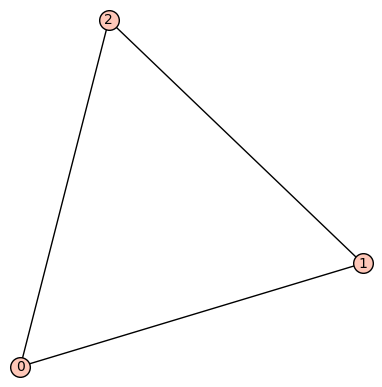

In [78]:
A = matrix([[0,1,1], [1,0,1], [1,1,0]])
k = Graph(A) # graphe complet K_3
k.show()

In [79]:
k.adjacency_matrix()

[0 1 1]
[1 0 1]
[1 1 0]

Et voici comment un graphe orienté et sa matrice d'adjacence :

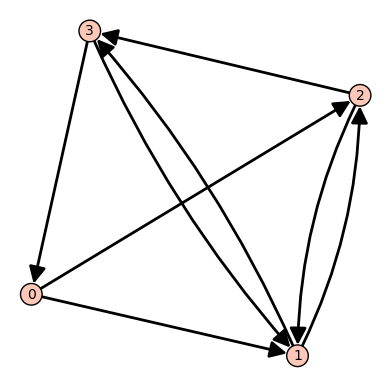

In [80]:
g = DiGraph([(0,1), (0,2), (1,2), (2,1), (2,3), (1,3), (3,0), (3,1)])
g.show()

Vous disposez maintenant de (presque) tous les moyens (matrice d'adjacence d'un graphe, valeurs propres...) pour comprendre l'algorithme sur lequel se base la recherche des plus imposants moteurs de recherche : GOOGLE.